<h1><center>SSP -- Assignment 1</center></h1>

In [1]:
%config InlineBackend.figure_format = 'retina' 
from math import *
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

## Basic Programming

### 1.

In [2]:
t = np.arange(0.,10.1,.1) #generate time vector t from 0 to 10, with a step of .1
f = lambda t: np.cos(np.pi*t)

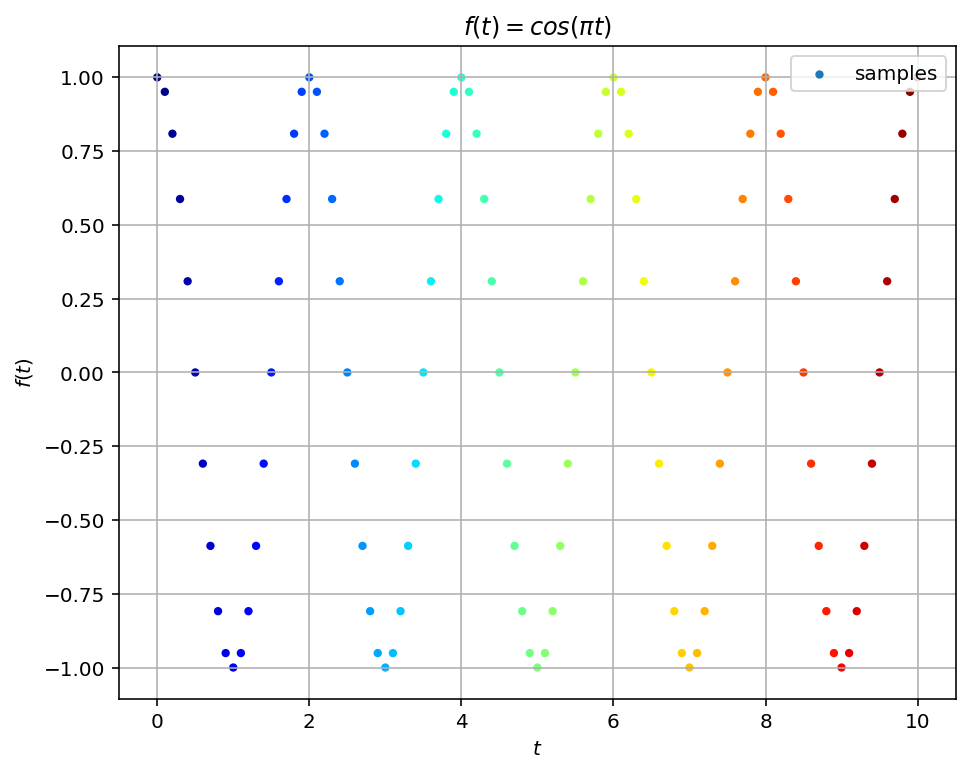

In [3]:
#plot the results
m = np.arange(len(t))
plt.figure(figsize=(7.5,6))
plt.scatter(t,f(t),c=m,marker='o',s=10,cmap='jet',alpha=1,label='samples')
plt.title(r"$f(t) = cos(\pi t)$")
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()
plt.grid()
plt.show()

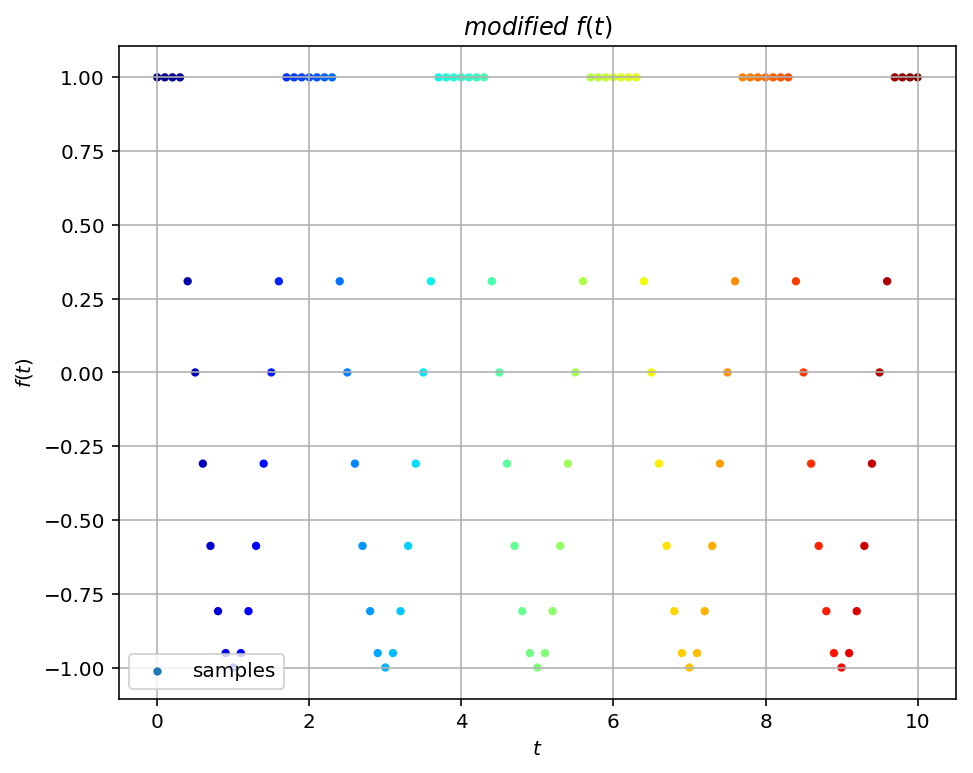

In [4]:
f = f(t)
f[f > .5] = 1.
plt.figure(figsize=(7.5,6))
plt.scatter(t,f,c=m,marker='o',s=10,cmap='jet',alpha=1,label='samples')
plt.title(r"$modified \ f(t)$")
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()
plt.grid()
plt.show()

### 2.

The Fibonacci sequence can be expressed as:
$$F_n=
\begin{cases}
0 & if \ n=0;\\
1 & if \ n=1;\\
F_{n-1}+F_{n-2} & if \ n>1
\end{cases}
$$

In [5]:
def Fibonacci(n):
    if n == 0: 
        return 0
    elif n == 1: 
        return 1
    else: 
        return Fibonacci(n-1)+Fibonacci(n-2)
    
def prime(x):
    if x >= 2:
        for n in range(2, x ):
            if (x % n) == 0:
                return "False"
        return "True"
    else:
        return "False"

In [6]:
cate = ['n','F(n)','prime']
row_format ="{:<12}" * len(cate)
print '***********'* len(cate)
print row_format.format(*cate)
print '***********'* len(cate)
for i in range(30):
    num = Fibonacci(i)
    print row_format.format(i+1,num,prime(num))

*********************************
n           F(n)        prime       
*********************************
1           0           False       
2           1           False       
3           1           False       
4           2           True        
5           3           True        
6           5           True        
7           8           False       
8           13          True        
9           21          False       
10          34          False       
11          55          False       
12          89          True        
13          144         False       
14          233         True        
15          377         False       
16          610         False       
17          987         False       
18          1597        True        
19          2584        False       
20          4181        False       
21          6765        False       
22          10946       False       
23          17711       False       
24          28657       True        
25     

### 3.

$$f(x,y) = \frac{1}{32\pi}(xy)^2 e^{-(x^2+y^2)/8}, for \ 0\leq x,y \leq 10.$$

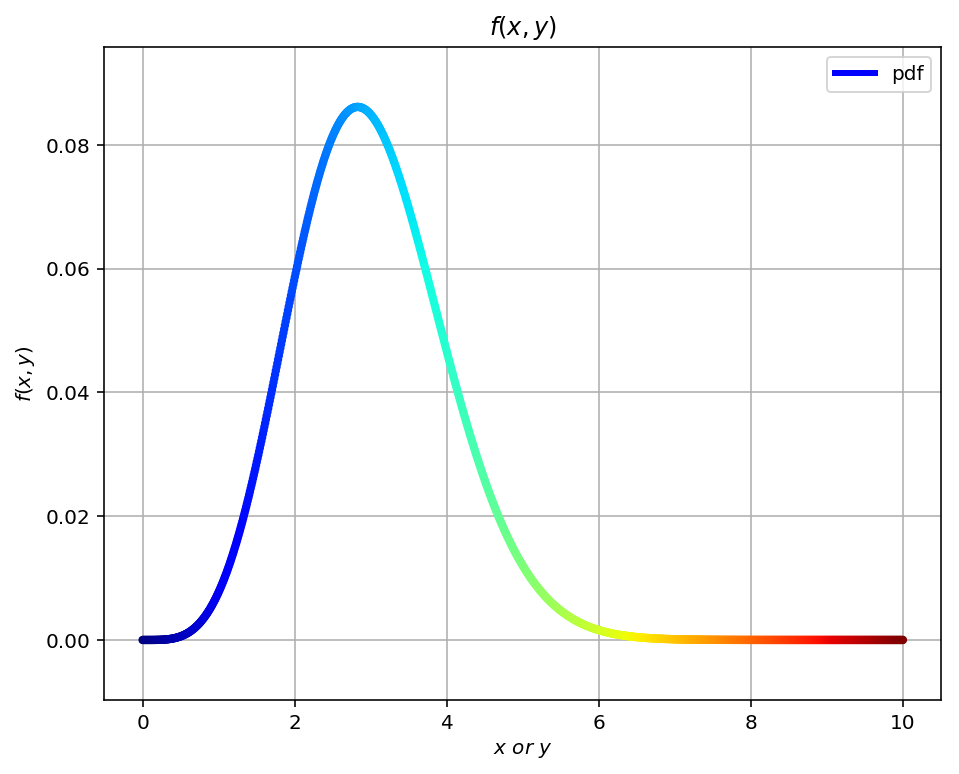

In [7]:
x = np.linspace(0.,10,1000)
y = np.linspace(0.,10,1000)

def f_pdf(x,y):
    return 1./(32*pi)*(x*y)**2 * np.exp(-(x*x +y*y)/8.)

m = np.arange(len(x))
plt.figure(figsize=(7.5,6))
plt.scatter(x,f_pdf(x,y),c=m,marker='o',s=10,cmap='jet',alpha=1,zorder=2)
plt.plot(x,f_pdf(x,y),color='b',lw = 3,zorder=1,label='pdf')
plt.title(r"$f(x,y)$")
plt.xlabel(r'$x \ or \ y$')
plt.ylabel(r'$f(x,y)$')
plt.legend()
plt.grid()
plt.show()

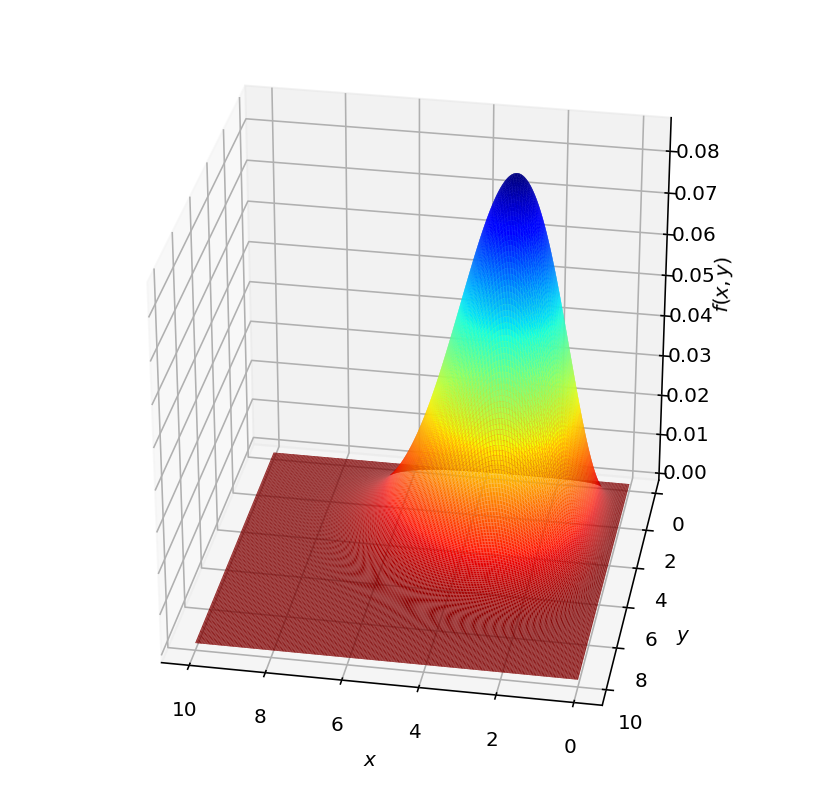

In [8]:
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
xx,yy = np.meshgrid(x,y)
z = f_pdf(xx,yy)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$f(x,y)$')
ax.plot_surface(xx, yy, z,  rstride=4, cstride=4, cmap='jet_r')
ax.view_init(30, 100)
plt.show()

Sometimes we only care about one parameter, thus we marginalise the nuisance parameter and leave only the parameter we want. This is done by:

\begin{align*}
f(x) &= \int\limits_0^\infty f(x,y)\,dy \\
&=\int\limits_0^{10} \frac{1}{32\pi}(xy)^2 e^{-(x^2+y^2)/8}\,dy\\
&=\frac{1}{32\pi }x^2e^{-x^2/8}\int\limits_0^{10}y^2e^{-y^2/8}\,dy\\
\end{align*}
So that $f(x)$ is obtained by evaluating $\int\limits_0^{10}y^2e^{-y^2/8}\,dy$.

In [9]:
# write the integrator

def integrate(f, a, b, N):
    x = np.linspace(a+(b-a)/(2.*N), b-(b-a)/(2.*N), N)
    fx = f(x)
    area = np.sum(fx)*(b-a)/N
    return area


In [10]:
def inte_y(y):
    return y*y*np.exp(-y*y/8.)

In [11]:
A = round(integrate(inte_y, 0.,10.,10000),4)
print"The integral is evaluated to be:", A

The integral is evaluated to be: 10.0264


Let $A = \int\limits_0^{10}y^2e^{-y^2/8}\,dy$. Therefore the function $f(x)$ becomes 
\begin{align*}
f(x) = \frac{A}{32\pi} x^2 e^{-x^2/8.}
\end{align*}

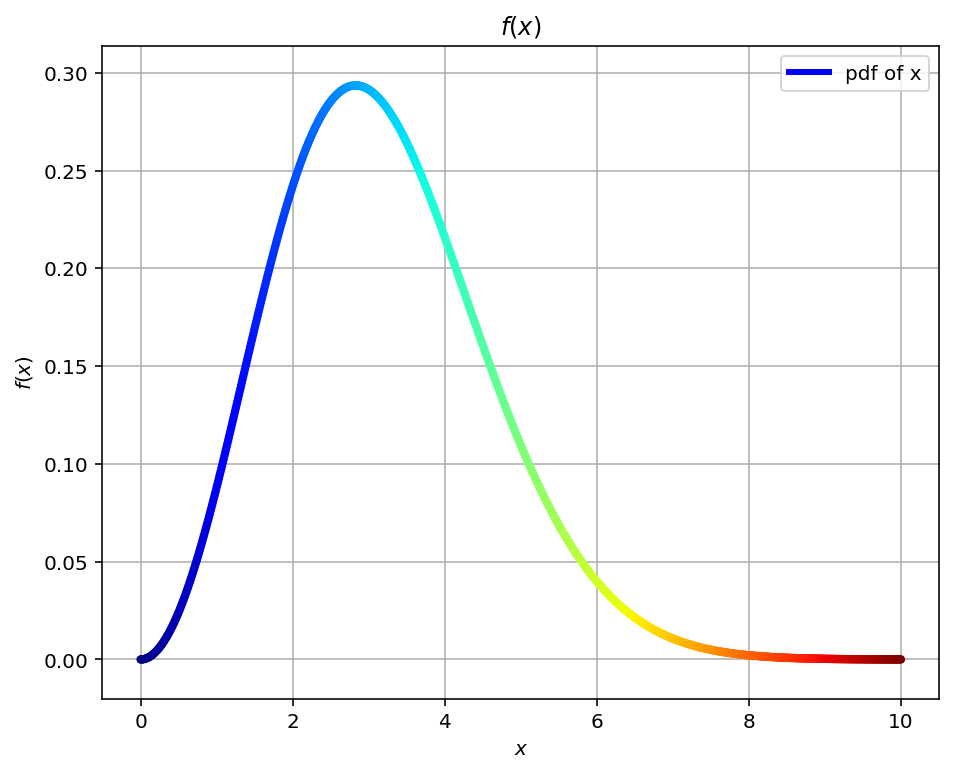

In [12]:
def fx(x):
    return A/(32*pi) * x*x * np.exp(-x*x/8.)

m = np.arange(len(x))
plt.figure(figsize=(7.5,6))
plt.scatter(x,fx(x),c=m,marker='o',s=10,cmap='jet',alpha=1,zorder=2)
plt.plot(x,fx(x),color='b',lw = 3,zorder=1,label='pdf of x')
plt.title(r"$f(x)$")
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()
plt.grid()
plt.show()

The expression of the CDF of random variable $X$ can be written as
\begin{align*}
CDF(x) &= \int_{-\infty}^{x}f_X(t)dt\\
&=\int_{-\infty}^{x}\frac{A}{32\pi}t^2 e^{-t^2/8}dt\\
\end{align*}

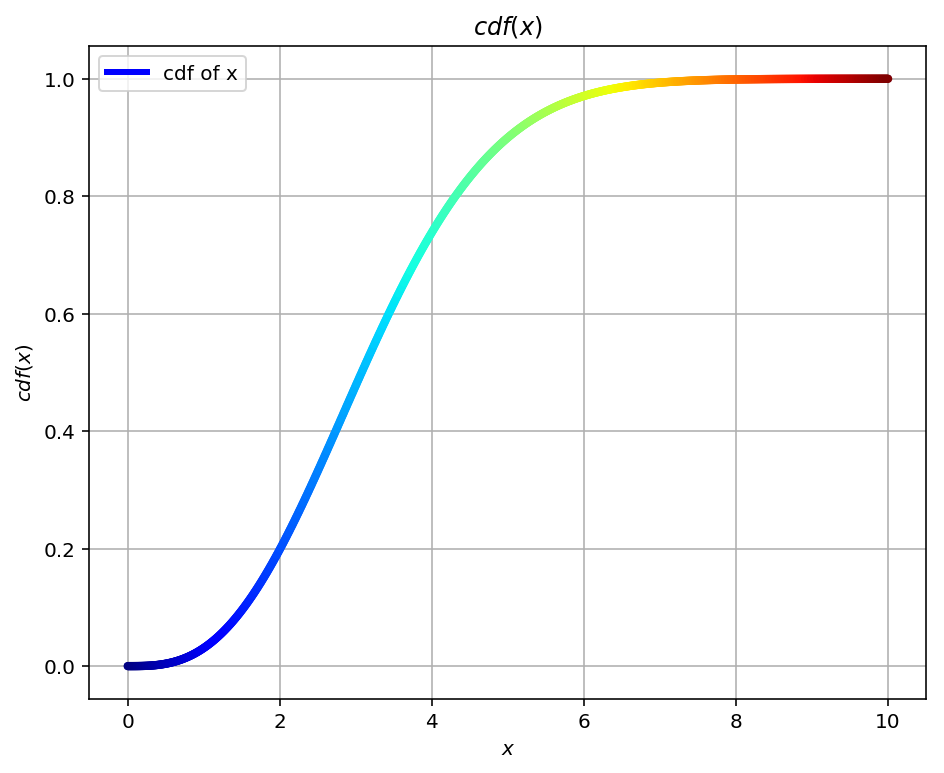

In [13]:
# Now calculate the CDF F(x)
y_cdf = [integrate(fx,0.,x1,10000) for x1 in x]

plt.figure(figsize=(7.5,6))
plt.scatter(x,y_cdf,c=m,marker='o',s=10,cmap='jet',alpha=1,zorder=2)
plt.plot(x,y_cdf,color='b',lw = 3,zorder=1,label='cdf of x')
plt.title(r"$cdf(x)$")
plt.xlabel(r'$x$')
plt.ylabel(r'$cdf(x)$')
plt.legend()
plt.grid()
plt.show()    

The expectation value $E(x)$ is found by evaluating the integral $E(x)=\int_0^{10}xf(x)dx=\int_0^{10}\frac{A}{32\pi} x^3 e^{-x^2/8.} dx$. And the vsriance $Var(x)$ is found by $Var(x)= E(x^2)-[E(x)]^2=\int_0^{10}\frac{A}{32\pi} x^4 e^{-x^2/8.} dx-\left(\int_0^{10}\frac{A}{32\pi} x^3 e^{-x^2/8.} dx\right)^2$.

In [14]:
def expectation(x):
    return A/(32*pi)*x**3 * np.exp(-x*x/8.)
def ex_xsq(x):
    return A/(32*pi)*x**4 * np.exp(-x*x/8.)
def var(x):
    return integrate(ex_xsq,0.,10.,10000) - (integrate(expectation,0.,10.,10000))**2

print "The expectation value E(x) is found to be:", round(integrate(expectation,0.,10.,10000),4)
print "The variance Var(x) is found to be:", round(var(x),4)

The expectation value E(x) is found to be: 3.1913
The variance Var(x) is found to be: 1.8135


## Random Numbers

### 1.

In [15]:
N = 10000; mu = 4; sig = sqrt(2)
x1 = np.linspace(-2,10,1000)
number = np.random.normal(mu,sig,N)
f_gaussian = lambda x: stats.norm.pdf(x1,mu,sig)

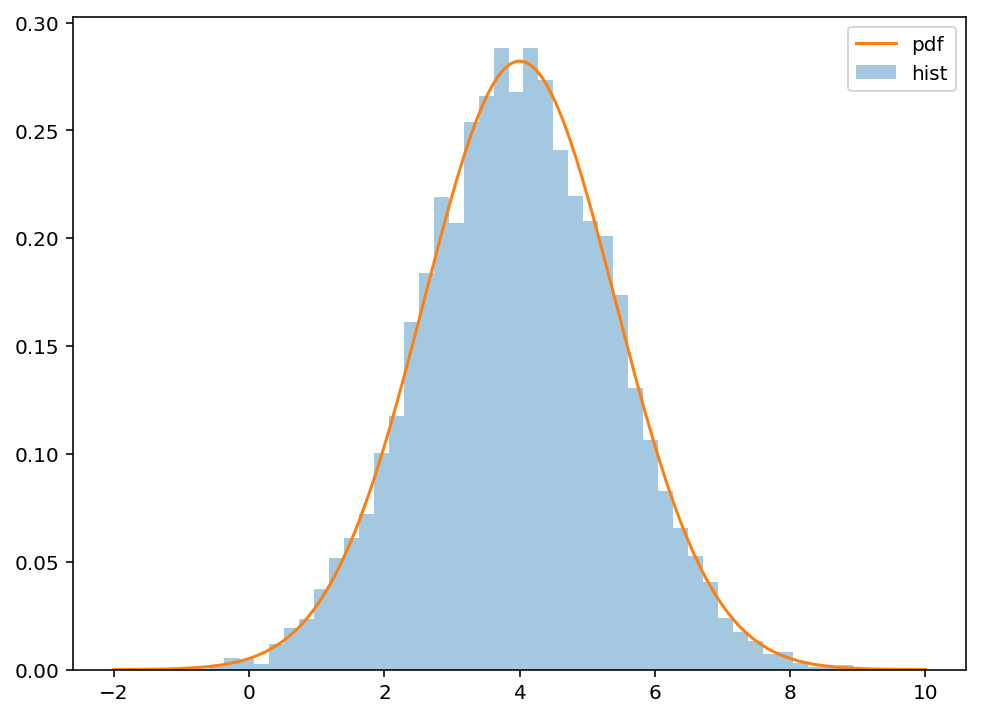

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(number, kde=False,norm_hist=True,label='hist')
plt.plot(x1, f_gaussian(x1),zorder=2,label='pdf')
plt.legend()
plt.show()

It can be seen that the histogram of the generated random variables is in good agreement with the pdf.

### 2.

$$Arg(x+iy)=
\begin{cases}
2\arctan\left(\frac{\sqrt{x^2+y^2}-x}{y}\right) & if \ y \neq 0;\\
0 & if x>0 \ and \ y=0;\\
\pi & if \ x<0 \ and \ y=0;\\
undefined & if \ x=0 \ and \ y=0.
\end{cases}$$
$$|x+iy|=|z|=\sqrt{x^2+y^2}$$
$$|x+iy|^2 = (x^2+y^2)$$

In [17]:
x2 = np.random.normal(0,1.,N)
y2 = np.random.normal(0,1.,N)
f_gaussian = lambda x: stats.norm.pdf(x2,0.,1.)
@np.vectorize
def arg_mod(x,y):
    if y!=0:
        arg = 2*np.arctan((np.sqrt(x*x+y*y)-x)/y)
    else:
        if x>0:
            arg = 0.
        if x<0:
            arg = np.pi
    mod = np.sqrt(x*x+y*y)
    mod_sq = mod * mod
    return arg,mod,mod_sq

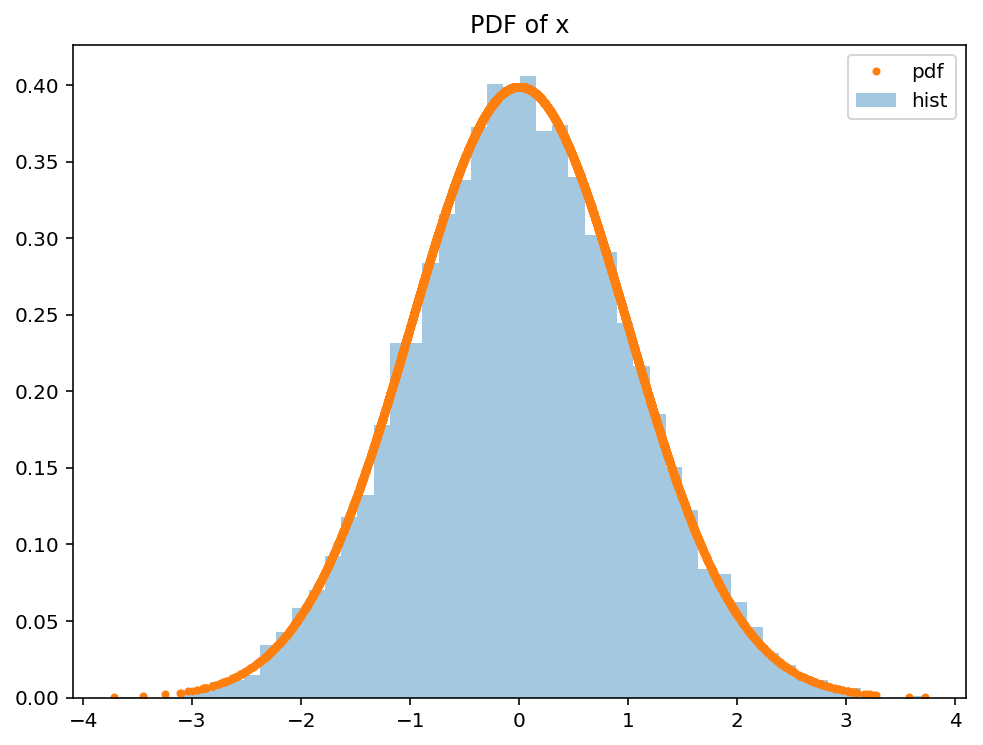

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(x2, kde=False,norm_hist=True,label='hist')
plt.plot(x2, f_gaussian(x2),'.',zorder=2,label='pdf')
plt.title('PDF of x')
plt.legend()
plt.show()

In [19]:
Arg,Mod,Mod_sq = arg_mod(x2,y2)

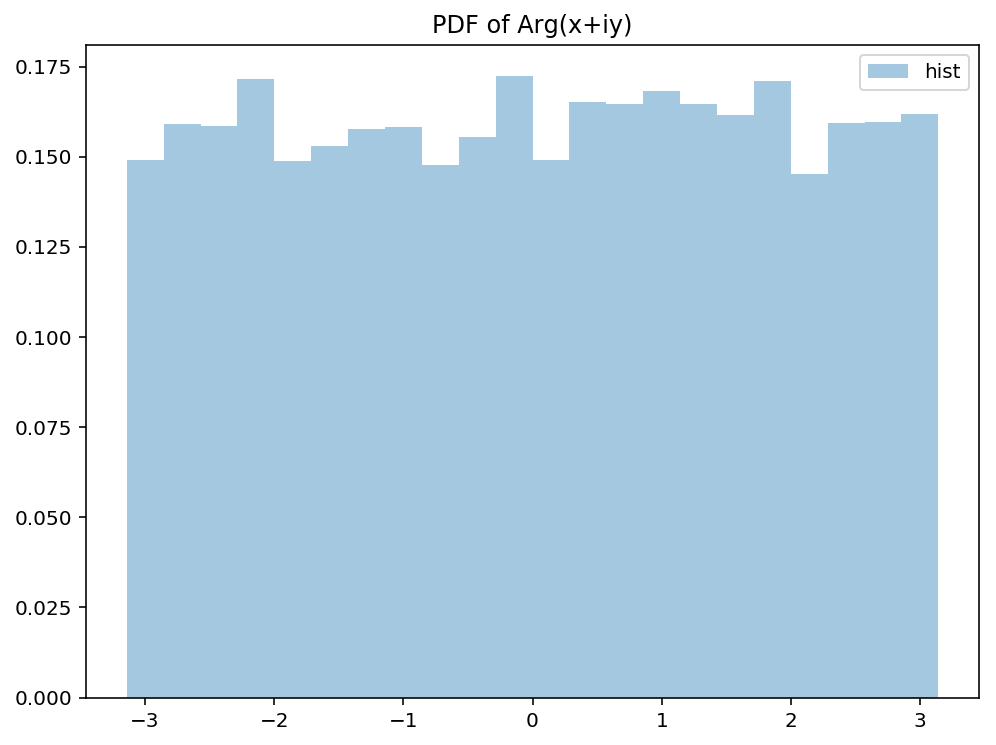

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(Arg, kde=False,norm_hist=True,label='hist')
plt.title('PDF of Arg(x+iy)')
plt.legend()
plt.show()

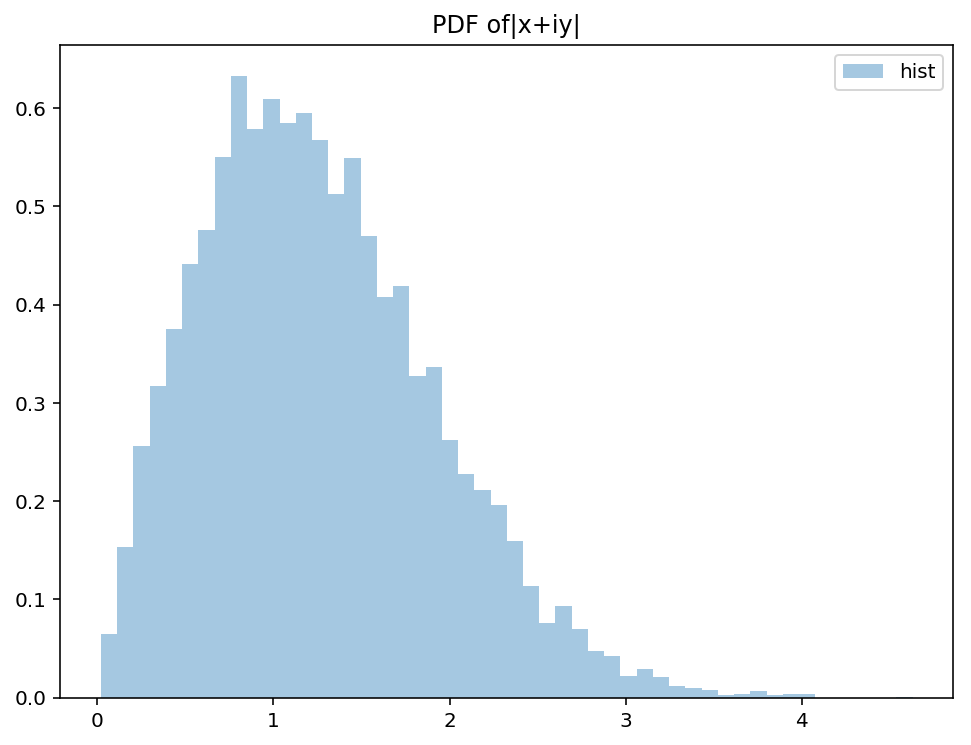

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(Mod, kde=False,norm_hist=True,label='hist')
plt.title('PDF of|x+iy|')
plt.legend()
plt.show()

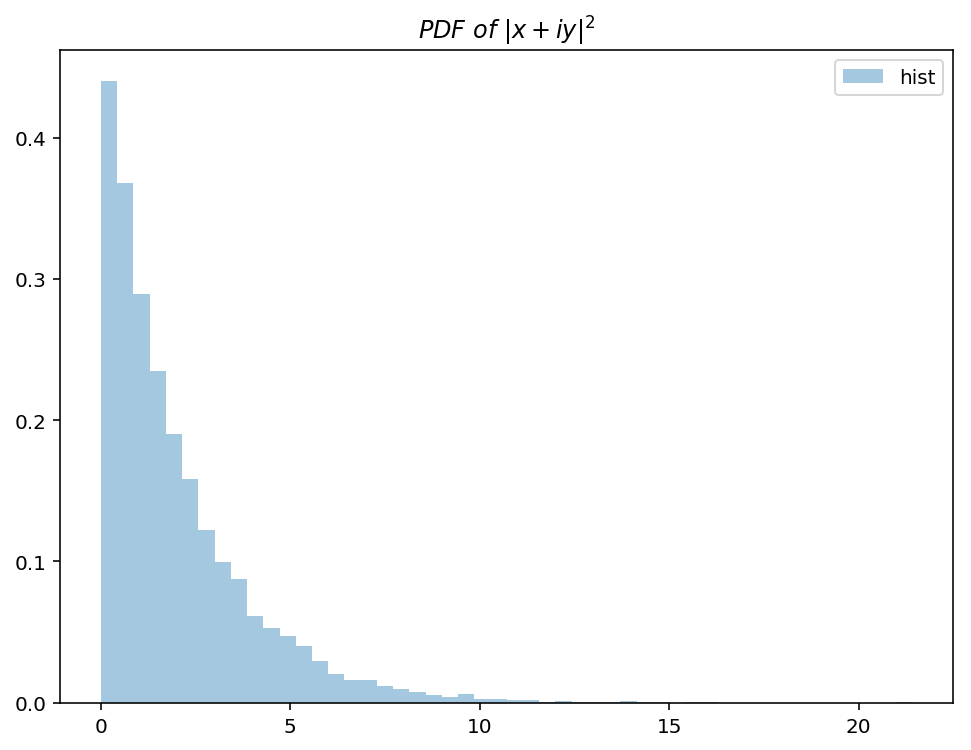

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(Mod_sq, kde=False,norm_hist=True,label='hist')
plt.title(r'$PDF \ of \ |x+iy|^2$')
plt.legend()
plt.show()

# Iteration

### 1.

In [23]:
#Generate a matrix

dim = 100
matrix_A = np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        if j == i:
            matrix_A[i][j] = 1.
        else:
            matrix_A[i][j] = 1./np.abs(i-j)


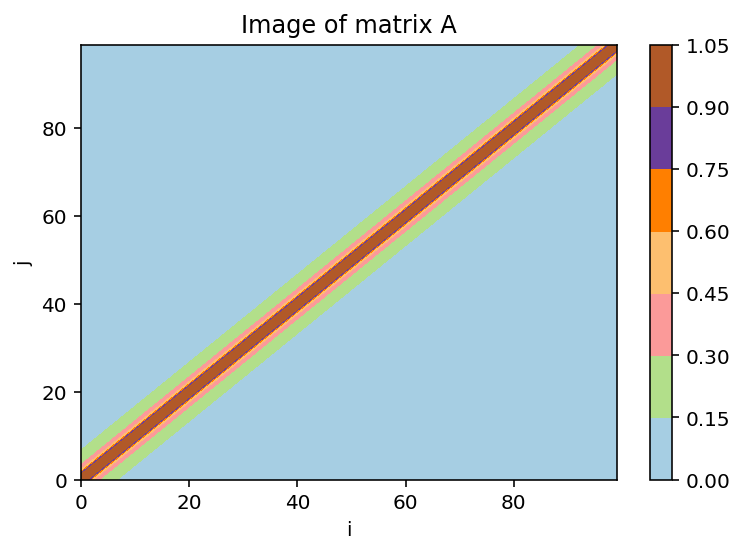

In [24]:
x3 = np.arange(0,dim,1)
y3 = x3
x3,y3 = np.meshgrid(x3,y3)
plt.contourf(x3,y3,matrix_A,cmap='Paired')
plt.title("Image of matrix A")
plt.xlabel("i")
plt.ylabel("j")
plt.colorbar()
plt.show()

### 2.

In [25]:
def random_steps(N):
    x = np.zeros(N+1); t = np.zeros(N+1)
    x0 = 0.; t0 = 0.
    x[0] = x0; t[0] = t0
    for i in range(N):
        step = np.random.randint(1,7)
        if step > 2:
            x0 += 1 #current step
            x[i+1] = x0 #step output
            t0 += 1 #current time
            t[i+1] = t0 #time output
        else:
            x0 -=1 #current step
            x[i+1] = x0 #step output
            t0 += 1 #current time
            t[i+1] = t0 #time output
    return x,t
    
x4,t4 = random_steps(100)

            

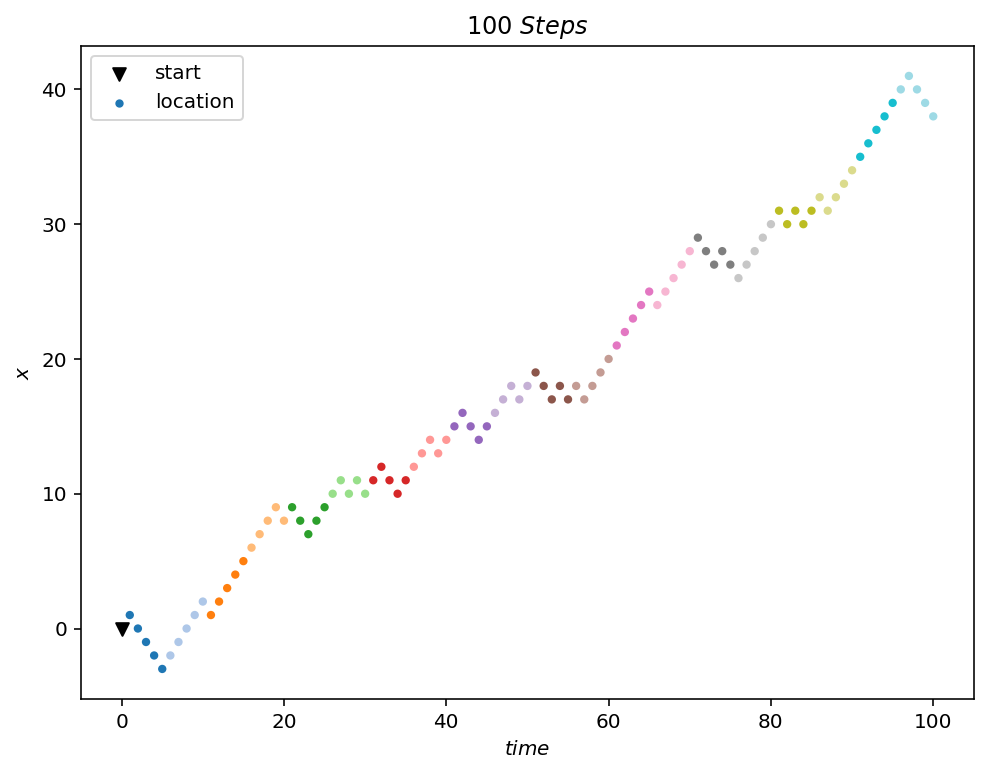

In [26]:
m = np.arange(len(x4[1:]))
plt.figure(figsize=(8,6))
plt.scatter(t4[0],x4[0],marker='v',color='k',s=40,label='start')
plt.scatter(t4[1:],x4[1:],s=10,c=m,cmap='tab20',label='location')
plt.xlabel(r'$time$')
plt.ylabel(r'$x$')
plt.title(r'$100 \ Steps$')
plt.legend()
plt.show()

In [27]:
#Now modify so that it stops when reaching 15

def mod_steps(lim):
    x = [0]; t = [0]
    x0 = 0.; t0 = 0.
    while x0<=lim:
        step = np.random.randint(1,7)
        if step > 2:
            x0 += 1 #current step
            x = np.append(x,x0) #step output
            t0 += 1 #current time
            t = np.append(t,t0) #time output
        else:
            x0 -=1 #current step
            x = np.append(x,x0) #step output
            t0 += 1 #current time
            t = np.append(t,t0) #time output
       
    return x,t
    

            

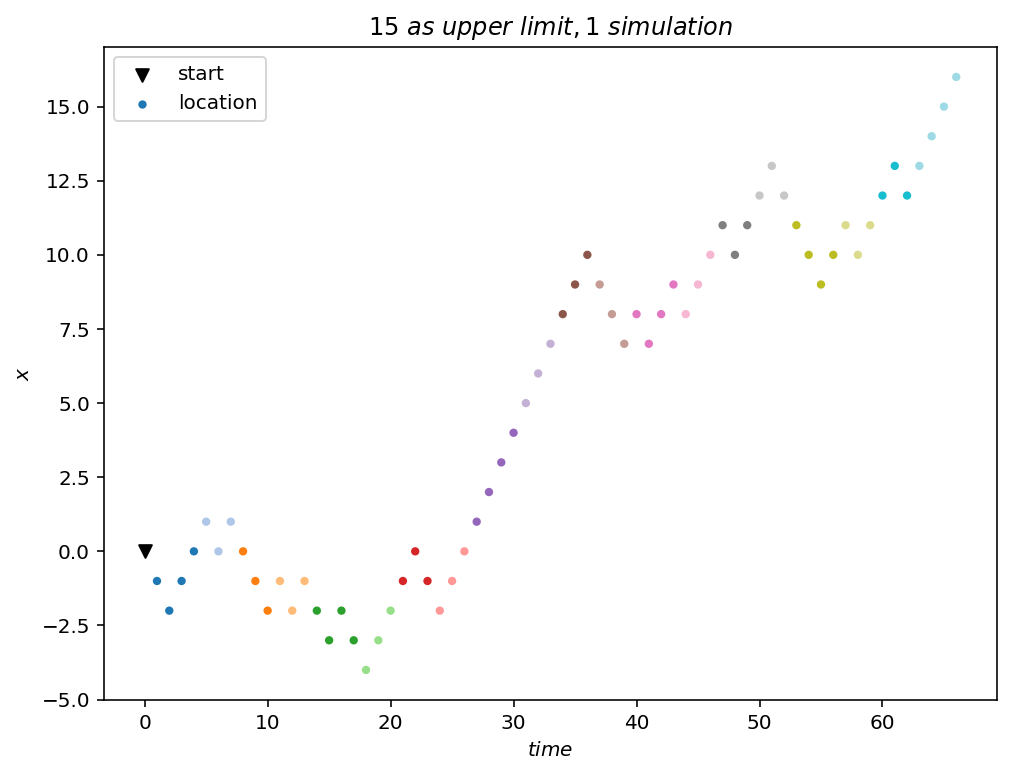

In [28]:
x5,t5 = mod_steps(15)
m = np.arange(len(x5[1:]))
plt.figure(figsize=(8,6))
plt.scatter(t5[0],x5[0],marker='v',color='k',s=40,label='start')
plt.scatter(t5[1:],x5[1:],s=10,c=m,cmap='tab20',label='location')
plt.xlabel(r'$time$')
plt.ylabel(r'$x$')
plt.title(r'$15 \ as \ upper \ limit, 1 \ simulation$')
plt.legend()
plt.show()


In [29]:
print 'The number of die rolls for this simulation is:',len(x5)-1

The number of die rolls for this simulation is: 66


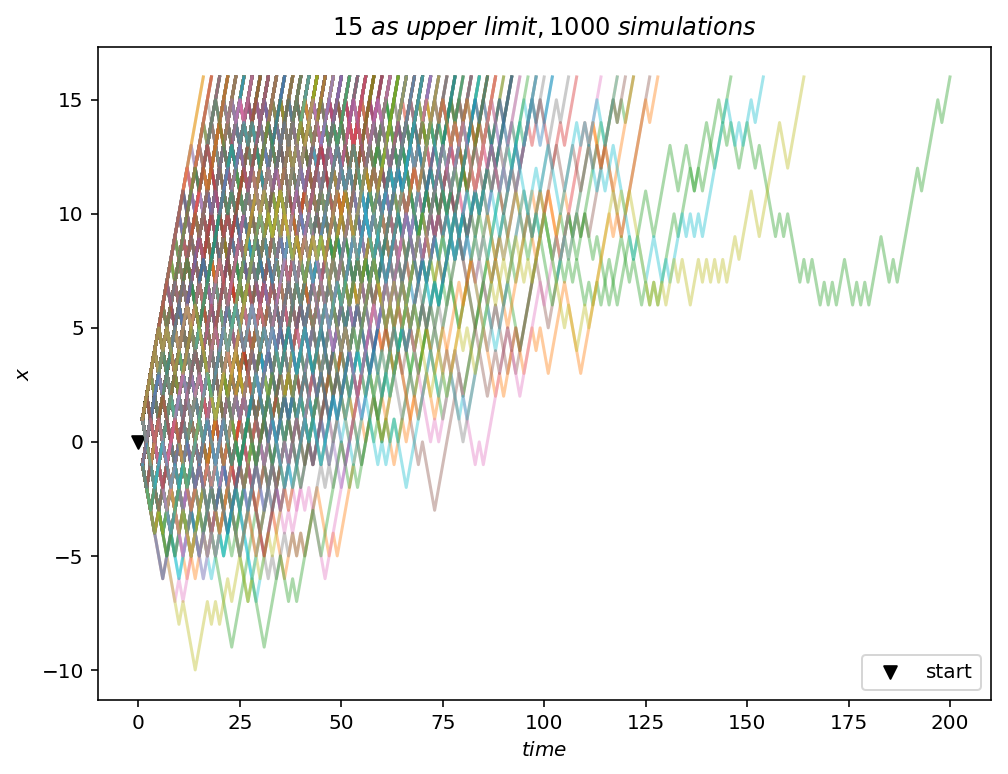

In [30]:
steps = []
plt.figure(figsize=(8,6))
plt.scatter(t5[0],x5[0],marker='v',color='k',s=40,label='start')
for i in range(1000):
    x5,t5 = mod_steps(15)
    num = len(x5)
    steps = np.append(steps,num)
    m = np.arange(len(x5[1:]))
    plt.plot(t5[1:],x5[1:],'-',alpha=.4)
plt.xlabel(r'$time$')
plt.ylabel(r'$x$')
plt.title(r'$15 \ as \ upper \ limit, 1000 \ simulations$')
plt.legend()
plt.show()

In [31]:
print "The average number of die rolls needed is:", steps.mean()

The average number of die rolls needed is: 48.868
